In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
%matplotlib inline

## ETL

In [3]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [4]:
#Negative Mean
index_mean = []
negative_index = []
for x in df.columns.tolist():
    if df[x].mean() < 0 :
        negative_index.append(x)
    index_mean.append(df[x].mean())
df[negative_index].mean()

PVMPGEW1 Index        -7.341969
ICCBAORN Index   -110960.386010
ICFUAPMN Index   -152313.759067
ICFUAORN Index   -109430.189119
ICCBAPMN Index   -153047.974093
CFCDQSWN Index   -584543.012953
CFCDQPMN Index     -6620.261658
CFCDPSWN Index   -152178.380829
dtype: float64

In [5]:
#Zero Std
index_std = []
zerostd_index = []
for x in df.columns.tolist():
    if df[x].std() == 0 :
        zerostd_index.append(x)
    index_std.append(df[x].std())
df[zerostd_index].std()

CUCNST Index    7.470382e-14
DSCNST Index    2.223328e-14
dtype: float64

In [9]:
df.drop(negative_index,axis=1,inplace=True)

In [10]:
df.drop(zerostd_index,axis=1,inplace=True)

In [11]:
df.columns

Index(['CO1 Comdty', 'CO2 Comdty', 'CO3 Comdty', 'CO4 Comdty',
       'PVMMDS12 Index', 'PVMMDS23 Index', 'PVMMD2M3 Index', 'PVMMD3M4 Index',
       'PVMMDBSP Index', 'DKI1 Comdty',
       ...
       'CFCDQORS Index', 'CFCDPORL Index', 'CFCDPORS Index', 'CFCDQPTS Index',
       'CFCDQSWD Index', 'CFCDPMMD Index', 'OISTCRDE Index', 'GBPUSD Curncy',
       'EURUSD Curncy', 'JPYUSD Curncy'],
      dtype='object', length=102)

In [50]:
corr = df.corr()

In [19]:
type(corr)

pandas.core.frame.DataFrame

In [20]:
corr

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
CO1 Comdty,1.000000,0.998153,0.995155,0.991619,0.411378,0.484058,0.435844,0.492953,0.477114,0.937914,...,0.132769,-0.516598,0.558870,0.221716,0.368697,0.308117,0.343927,0.176524,0.131145,-0.260475
CO2 Comdty,0.998153,1.000000,0.999174,0.997270,0.370445,0.444838,0.395609,0.452818,0.445921,0.941106,...,0.141417,-0.538384,0.527754,0.217141,0.402707,0.315152,0.344346,0.166317,0.127923,-0.282691
CO3 Comdty,0.995155,0.999174,1.000000,0.999423,0.340385,0.414662,0.365994,0.422198,0.420531,0.942874,...,0.143262,-0.550607,0.504604,0.210974,0.429117,0.326927,0.339003,0.153611,0.120589,-0.301191
CO4 Comdty,0.991619,0.997270,0.999423,1.000000,0.317547,0.389607,0.343712,0.397022,0.398804,0.944708,...,0.140062,-0.557244,0.485758,0.201392,0.450083,0.340394,0.330906,0.137617,0.109640,-0.319791
PVMMDS12 Index,0.411378,0.370445,0.340385,0.317547,1.000000,0.901654,0.976627,0.899384,0.422779,0.400602,...,-0.306225,0.314018,0.614739,0.021496,-0.378788,0.026492,-0.064504,-0.103212,-0.233828,0.050210
PVMMDS23 Index,0.484058,0.444838,0.414662,0.389607,0.901654,1.000000,0.867585,0.966861,0.457157,0.378910,...,-0.185670,0.220650,0.570211,0.073005,-0.377360,-0.024545,0.005916,0.104137,-0.053482,0.210962
PVMMD2M3 Index,0.435844,0.395609,0.365994,0.343712,0.976627,0.867585,1.000000,0.906041,0.445819,0.429543,...,-0.302214,0.282828,0.649003,0.048385,-0.349616,0.034377,-0.035838,-0.097803,-0.228620,0.031611
PVMMD3M4 Index,0.492953,0.452818,0.422198,0.397022,0.899384,0.966861,0.906041,1.000000,0.495482,0.393812,...,-0.177748,0.204870,0.624712,0.105689,-0.357829,-0.026086,0.041617,0.105606,-0.049455,0.210074
PVMMDBSP Index,0.477114,0.445921,0.420531,0.398804,0.422779,0.457157,0.445819,0.495482,1.000000,0.299112,...,0.445760,-0.420495,0.721926,0.377005,-0.071339,-0.124895,0.655748,0.552350,0.613865,0.403384
DKI1 Comdty,0.937914,0.941106,0.942874,0.944708,0.400602,0.378910,0.429543,0.393812,0.299112,1.000000,...,-0.025506,-0.428723,0.497168,0.095145,0.394728,0.423144,0.179486,-0.040938,-0.084281,-0.463029


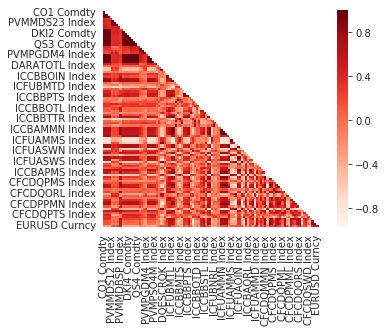

In [29]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,cmap="Reds")

In [74]:
index_name = corr.drop(['sum','mean'],axis=1).columns.tolist()

In [66]:
G = nx.Graph()

In [75]:
x = 0
y = 0
for i in index_name:
    for j in index_name:
        G.add_edge(i,j
                   ,weight= df[i][x])
        y += 1
    x += 1

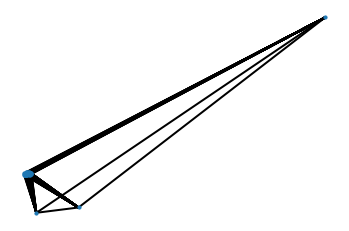

In [83]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=2)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1)

# labels
#nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()